In [5]:
# EASY LEVEL: Image Classification using MobileNetV2

import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
import os

# Unzip the 'PetImages.zip' file
with zipfile.ZipFile('PetImages.zip', 'r') as zip_ref:
    zip_ref.extractall('PetImages') # Extracts to a folder named 'PetImages'

# Load pre-trained MobileNetV2 model without top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Load and preprocess dataset (Cats vs. Dogs)
datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)
train_data = datagen.flow_from_directory(
    'PetImages', # Now pointing to the extracted directory
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)
val_data = datagen.flow_from_directory(
    'PetImages', # Now pointing to the extracted directory
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Train the model
model.fit(train_data, validation_data=val_data, epochs=5)


Found 162 images belonging to 1 classes.
Found 40 images belonging to 1 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.8124 - loss: 0.2928 - val_accuracy: 1.0000 - val_loss: 5.6647e-05
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 1.0000 - loss: 3.9430e-05 - val_accuracy: 1.0000 - val_loss: 1.4884e-06
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 1.0000 - loss: 1.6577e-06 - val_accuracy: 1.0000 - val_loss: 2.2055e-07
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 1.0000 - loss: 6.0575e-07 - val_accuracy: 1.0000 - val_loss: 7.5541e-08
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 1.0000 - loss: 1.5459e-07 - val_accuracy: 1.0000 - val_loss: 4.0979e-08


In [6]:
# INTERMEDIATE LEVEL: Sentiment Analysis using LSTM

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM
from tensorflow.keras.datasets import imdb

# Load dataset
max_words = 10000  # Vocabulary size
max_len = 100  # Max sequence length
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

# Pad sequences
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

# Build LSTM model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(64, return_sequences=True),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 174ms/step - accuracy: 0.7423 - loss: 0.5041 - val_accuracy: 0.8416 - val_loss: 0.3595
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 153s 188ms/step - accuracy: 0.8968 - loss: 0.2604 - val_accuracy: 0.8508 - val_loss: 0.3430
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 202s 189ms/step - accuracy: 0.9325 - loss: 0.1829 - val_accuracy: 0.8459 - val_loss: 0.3826
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 207s 196ms/step - accuracy: 0.9476 - loss: 0.1405 - val_accuracy: 0.8371 - val_loss: 0.4355
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 184s 172ms/step - accuracy: 0.9739 - loss: 0.0782 - val_accuracy: 0.8364 - val_loss: 0.5646


PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/PetImages_predict/PetImages/0.jpg: 480x640 2 cats, 1 chair, 540.8ms
Speed: 3.6ms preprocess, 540.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


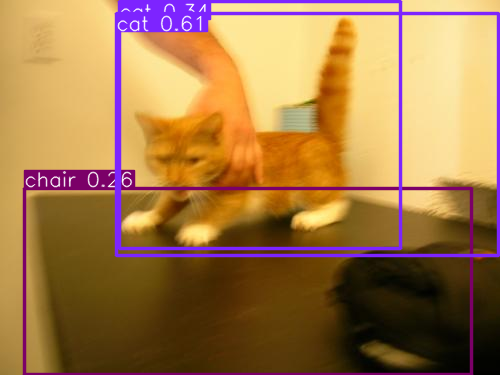

In [22]:
# ADVANCED LEVEL: Object Detection using YOLOv5

!pip install ultralytics  # Install YOLOv5
from ultralytics import YOLO
import zipfile
import os

# Unzip the 'PetImages predict.zip' file
# It's assumed the zip file has this name to contain images for prediction
with zipfile.ZipFile('PetImages_predict.zip', 'r') as zip_ref:
    zip_ref.extractall('PetImages_predict') # Extracts to 'PetImages_predict'

# Load YOLOv5 model
model = YOLO('yolov5s.pt')  # Pre-trained model

# Run inference on images
# Updated path to reflect the new extraction folder and potential file name
results = model.predict('PetImages_predict/PetImages/0.jpg',show=True)  # Provide dataset path

# If the image file name is different, adjust accordingly (e.g., 'image.jpg', 'cat.png')
# Check the contents of the extracted 'PetImages_predict' folder to confirm file names.

results[0].show()

In [26]:
from tensorflow.keras.layers import Input, Concatenate, Flatten
from transformers import TFBertModel, BertTokenizer
import tensorflow as tf

# Define Image Model (CNN)
image_input = Input(shape=(224, 224, 3))
x = MobileNetV2(weights='imagenet', include_top=False)(image_input)
x = GlobalAveragePooling2D()(x)
image_features = Dense(128, activation='relu')(x)

# Define Text Model (BERT)
# 1. Use tf.keras.Input instead of Input
text_input = tf.keras.Input(shape=(128,), dtype='int32')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# 2. Wrap bert_model call in a Lambda layer and specify output_shape
text_features = tf.keras.layers.Lambda(
    lambda x: bert_model(x)[1],
    output_shape=(768,)  # Specify the output shape of BERT's pooled output
)(text_input)

text_features = Dense(128, activation='relu')(text_features)

# Merge Models
merged = Concatenate()([image_features, text_features])
out = Dense(1, activation='sigmoid')(merged)
final_model = Model(inputs=[image_input, text_input], outputs=out)

# Compile Model
final_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

<ipython-input-26-a40d78039b15>:7: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  x = MobileNetV2(weights='imagenet', include_top=False)(image_input)
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSeq